In [5]:
df = pd.read_csv('zomato.csv')


Mean Squared Error: 0.17892900000000192
R² Score: nan


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


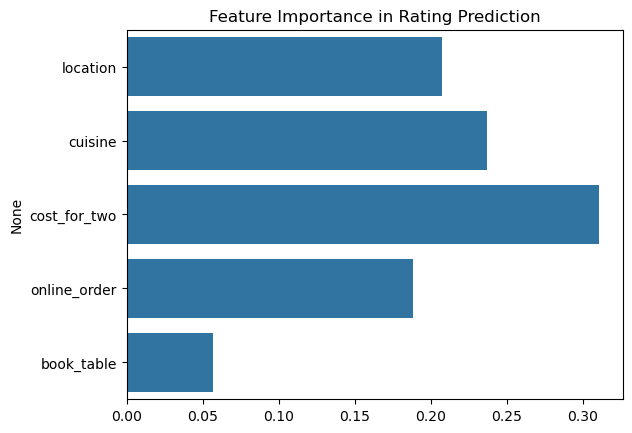

In [6]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Load dataset
# For demo purposes, we simulate the Zomato dataset
data = pd.DataFrame({
    'restaurant_name': ['A', 'B', 'C', 'D', 'E'],
    'location': ['Delhi', 'Mumbai', 'Delhi', 'Bangalore', 'Mumbai'],
    'cuisine': ['North Indian', 'Chinese', 'Italian', 'South Indian', 'Chinese'],
    'cost_for_two': [500, 800, 750, 300, 650],
    'online_order': ['Yes', 'No', 'Yes', 'No', 'Yes'],
    'book_table': ['No', 'Yes', 'No', 'No', 'Yes'],
    'rating': [4.1, 3.5, 4.3, 3.0, 4.0]
})

# Encode categorical variables
le = LabelEncoder()
data['location'] = le.fit_transform(data['location'])
data['cuisine'] = le.fit_transform(data['cuisine'])
data['online_order'] = le.fit_transform(data['online_order'])
data['book_table'] = le.fit_transform(data['book_table'])

# Features and target
X = data[['location', 'cuisine', 'cost_for_two', 'online_order', 'book_table']]
y = data['rating']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

# Plot feature importances
importances = model.feature_importances_
feat_names = X.columns
sns.barplot(x=importances, y=feat_names)
plt.title("Feature Importance in Rating Prediction")
plt.show()
